In [3]:
print('hi all!')

hi all!


I can just write words (this is a markdown cell).

# This is a big header

## Smaller header

### Smaller even header

I can make an unordered list:
 * this is the first element in my list
 * this is the second element in my list
 
I can also make an ordered list:
 1. This will be number 1
 1. this will be a totally different thing
 1. this will be another thing


I pressed `ESC-m` to make this a markdown cell.

Another useful hot-key is `SHIFT+RETURN` - run the cell (just like pressing the run button) -- the command is `SHIFT+ENTER` on a Windows!

Another few that are going to be used less are: `ESC-a` to insert a cell above and `ESC-b` to insert a cell below.

In [5]:
4+5

9

4+5

$x = \frac{7}{y}$ (LaTex formatting, not going to use this really, but its there!)

# 1. Making plots!

In [6]:
%matplotlib inline

In [7]:
# this is a comment -- I am importing matplotlib
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [8]:
# importing one last thing -- numpy library for arrays/matricies
import numpy as np

In [11]:
time = [20070101, 20070401, 20070701, 20071001, 20080101, 20080401, 20080701, 20081001, 20090101]
time

[20070101,
 20070401,
 20070701,
 20071001,
 20080101,
 20080401,
 20080701,
 20081001,
 20090101]

In [10]:
print(time)

[20070101, 20070401, 20070701, 20071001, 20080101, 20080401, 20080701, 20081001, 20090101]


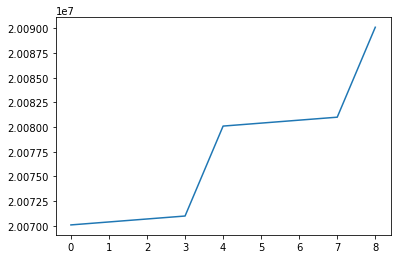

In [12]:
# finally making a plot!
plt.plot(time)

Text(0, 0.5, 'YearMonthDay')

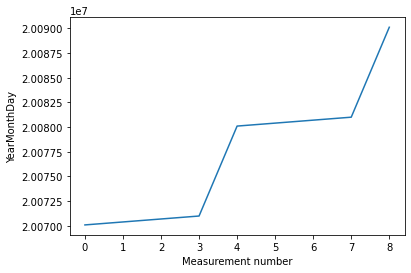

In [13]:
# add some x/y labels to our plot
plt.plot(time)

plt.xlabel('Measurement number') # adding an x-axis label
plt.ylabel('YearMonthDay')

In [14]:
gdp = [14233.2, 14422.3, 14569.7, 14685.3, 14668.4, 14813.0, 14843.0, 14549.9, 14383.9] # US GDP in billions

In [15]:
gdp

[14233.2,
 14422.3,
 14569.7,
 14685.3,
 14668.4,
 14813.0,
 14843.0,
 14549.9,
 14383.9]

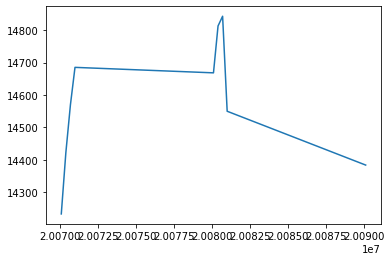

In [17]:
plt.plot(time,gdp) # plot of GDP (in billions) as a function of time (YearMonthDay)

Text(0, 0.5, 'GDP in Billions')

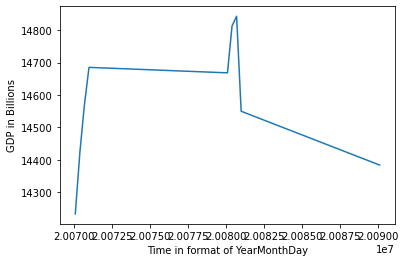

In [18]:
plt.plot(time,gdp) # plot of GDP (in billions) as a function of time (YearMonthDay)

plt.xlabel('Time in format of YearMonthDay') # x-axis label
plt.ylabel('GDP in Billions') # y-axis label

Text(0, 0.5, 'GDP in Billions')

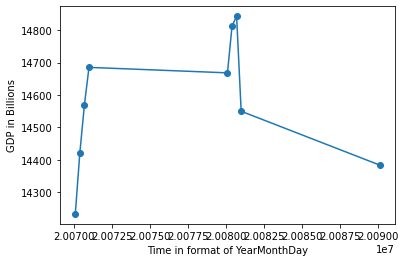

In [19]:
plt.plot(time,gdp, 'o-') # plot of GDP (in billions) as a function of time (YearMonthDay)

plt.xlabel('Time in format of YearMonthDay') # x-axis label
plt.ylabel('GDP in Billions') # y-axis label

Transforming our data **this is something we are going to get very familar with!**

*I can also do italics!*

In [26]:
date = []
# do a for-loop that updates our date array with the correct formatting
for t in time:
    date.append( datetime.datetime.strptime(str(t), '%Y%m%d') )

In [27]:
date

[datetime.datetime(2007, 1, 1, 0, 0),
 datetime.datetime(2007, 4, 1, 0, 0),
 datetime.datetime(2007, 7, 1, 0, 0),
 datetime.datetime(2007, 10, 1, 0, 0),
 datetime.datetime(2008, 1, 1, 0, 0),
 datetime.datetime(2008, 4, 1, 0, 0),
 datetime.datetime(2008, 7, 1, 0, 0),
 datetime.datetime(2008, 10, 1, 0, 0),
 datetime.datetime(2009, 1, 1, 0, 0)]

Text(0, 0.5, 'GDP in Billions')

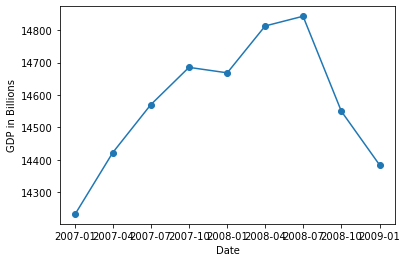

In [29]:
plt.plot(date,gdp, 'o-')

plt.xlabel('Date') # x-axis label
plt.ylabel('GDP in Billions') # y-axis label

# 2. Reading in data from a file
(the hard way!)

Usually we'll use the `Pandas` package to read data, but here is a look at what is going on "under the hood":

In [30]:
myFredFile = "/Users/jillnaiman/Downloads/GDP.csv"
# if we've put the file in the same place as our notebook 
#myFredFile = "GDP.csv"

In [35]:
def converter(v):
    #print(v, v.decode("ascii"))
    return datetime.datetime.strptime(v.decode("ascii"), '%Y-%m-%d')

In [36]:
# store this in a named array
myFredType = np.dtype([("date", datetime.datetime), ("gdp", np.float64)])

In [37]:
with open(myFredFile, "r") as f:
    data = np.loadtxt(f, skiprows=1, delimiter=",", converters={0: converter}, dtype=myFredType)
    # Note: this {0: converter} bit just means we are only using the one converter for our data


In [38]:
data

array([(datetime.datetime(1947, 1, 1, 0, 0),   243.164),
       (datetime.datetime(1947, 4, 1, 0, 0),   245.968),
       (datetime.datetime(1947, 7, 1, 0, 0),   249.585),
       (datetime.datetime(1947, 10, 1, 0, 0),   259.745),
       (datetime.datetime(1948, 1, 1, 0, 0),   265.742),
       (datetime.datetime(1948, 4, 1, 0, 0),   272.567),
       (datetime.datetime(1948, 7, 1, 0, 0),   279.196),
       (datetime.datetime(1948, 10, 1, 0, 0),   280.366),
       (datetime.datetime(1949, 1, 1, 0, 0),   275.034),
       (datetime.datetime(1949, 4, 1, 0, 0),   271.351),
       (datetime.datetime(1949, 7, 1, 0, 0),   272.889),
       (datetime.datetime(1949, 10, 1, 0, 0),   270.627),
       (datetime.datetime(1950, 1, 1, 0, 0),   280.828),
       (datetime.datetime(1950, 4, 1, 0, 0),   290.383),
       (datetime.datetime(1950, 7, 1, 0, 0),   308.153),
       (datetime.datetime(1950, 10, 1, 0, 0),   319.945),
       (datetime.datetime(1951, 1, 1, 0, 0),   336.   ),
       (datetime.datetime(1

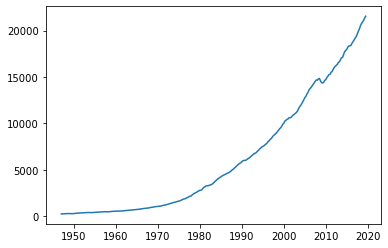

In [39]:
plt.plot(data['date'], data['gdp'])